**3.1 Timetabling Problem Solving using Local Search/Simulated Annealing**   
Suppose that you have access to the information on students enrolled in various elective subjects of a master's/doctoral program. Each subject has only one weekly class. We want to build a schedule/timetable using only a specified number of slots (available hours) and minimizing the number of incompatibilities for students (i.e., subjects that enrolled students will not be able to attend because of temporal overlaps in the respective schedules). To do this, the class of each subject must be assigned to a slot (from the available ones). Consider the example problem represented below:  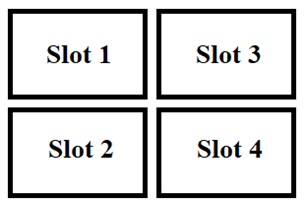
**Facts Representation**  
slots (4).  
disciplines (12).  
students (12).  
discipline (1, [1,2,3,4,5]).  # Students 1,2,3,4,5 enrolled in discipline 1  
discipline (2, [6,7,8,9]).  
discipline (3, [10,11,12]).  
discipline (4, [1,2,3,4]).  
discipline (5, [5,6,7,8]).  
discipline (6, [9,10,11,12]).  
discipline (7, [1,2,3,5]).  
discipline (8, [6,7,8]).  
discipline (9, [4,9,10,11,12]).  
discipline (10, [1,2,4,5]).  
discipline (11, [3,6,7,8]).  
discipline (12, [9,10,11,12]). # Students 9,10,11,12 enrolled in discipline 12  

**Text File Representation**  
4 12 12      # Problem with 4 Slots and 12 Disciplines and 12 students  
1 2 3 4 5    // Students 1,2,3,4,5 enrolled in discipline 1  
6 7 8 9  
10 11 12  
1 2 3 4  
5 6 7 8  
9 10 11 12  
1 2 3 5  
6 7 8  
4 9 10 11 12  
1 2 4 5  
3 6 7 8  
9 10 11 12    // Students 9,10,11,12 enrolled in discipline 12  

a)	Define a means of representation of a solution and create a method that allows you to randomly create a solution.  

b)	Build a function that allows you to calculate an incompatibilities table, that is, for each pair of subjects (discipline) calculates the number of students who are enrolled in both.  

c)	In this problem, the simplest representation for a solution (assignment of disciplines to slots) consists of associating, to each discipline 1..nd, a slot 1..ns, where nd is the number of disciplines and ns is the number of slots. For this purpose, we can use a list of integers nd, whose values are numbers from 1 to ns. The list index identifies the respective discipline, and the value inside the list represents the slot to which it has been assigned. For example, in list [4,1,2,3,2,4,1,1,2,2,2,3] discipline 1 has been assigned to slot 4, such as discipline 6. Implement a function that allows you to evaluate a particular solution, by calculating the total number of students enrolled in overlapping subjects.  

d)	Define one or more neighboring spaces and neighbor functions capable of calculating the neighbors of a solution.  

# Artificial Intelligence 
### L.EIC – 3rd Year/2nd Semester
### Exercise Sheet 3
## Optimization/Meta-Heuristics

In [3]:
# Problem Definition  3+1+3+1

import numpy as np
import copy, random, math

enrollments = {
    1: [1,2,3,4,5],
    2: [6,7,8,9], 
    3: [10,11,12],# Slot 2
    4: [1,2,3,4], 
    5: [5,6,7,8], # Slot 2
    6: [9,10,11,12],
    7: [1,2,3,5], 
    8: [6,7,8],   
    9: [4,9,10,11,12], # Slot 2
    10: [1,2,4,5],     # Slot 2
    11: [3,6,7,8],     # Slot 2
    12: [9,10,11,12]
}
slots = 4
num_students = 12
num_enrollments = len(enrollments)


# 4.1 a)
def generate_random_solution():
    return np.random.randint(1, slots + 1, num_enrollments)

# 4.1 b)
def get_num_incompatibilities(discipline_1, discipline_2):
    if (discipline_1 not in enrollments or discipline_2 not in enrollments):
        return 0
    incompatibilities = [student for student in enrollments[discipline_1] if student in enrollments[discipline_2]]
    return len(incompatibilities)
    
# 4.1 c)
def evaluate_solution(solution):
    num_incompatibilities = 0

    #Your Code Here
    for slot in range(1, slots+1):
        for discipline_1 in range(1, num_enrollments+1):
            for discipline_2 in range(discipline_1+1, num_enrollments+1):
                if (solution[discipline_1-1] == slot and solution[discipline_2-1] == slot):
                    num_incompatibilities += get_num_incompatibilities(discipline_1, discipline_2)
        # print("Slot " + str(slot) + ": " + str(num_incompatibilities) + " incompatibilities")

    return -num_incompatibilities

solution = [4,1,2,3,2,4,1,1,2,2,2,3]
# evaluate_solution(solution)

# 4.1 d)
# Change the slot of a discipline
def get_neighbor_solution1(solution):
    neighbor = copy.deepcopy(solution)
    
    discipline = np.random.randint(1, num_enrollments + 1)
    current_slot = neighbor[discipline-1]
    offset = np.random.randint(1, slots)

    neighbor[discipline-1] = ((current_slot + offset - 1) % slots) + 1
    
    return neighbor



# Exchange the slots of two disciplines
def get_neighbor_solution2(solution):
    neighbor = copy.deepcopy(solution)
    
    # Lets assume that the slots might happen to be the same (and in this case the solution will not change)
    # We can simply make a cycle to keep generating new random numbers until they are different, but that might lead to some weird performance variations

    #Picking 2 random disciplines (and making sure they are different)
    discipline_1 = np.random.randint(1, num_enrollments + 1)
    offset = np.random.randint(1, num_enrollments)
    discipline_2 = ((discipline_1 + offset - 1) % num_enrollments) + 1

    # Swap disciplines
    neighbor[discipline_1-1], neighbor[discipline_2-1] = solution[discipline_2-1], solution[discipline_1-1]
    
    return neighbor

print(solution)
print(get_neighbor_solution2(solution))

# Neighbour 1 or 2 with 50% each
def get_neighbor_solution3(solution):
    if (np.random.randint(0,2)==0):
        return get_neighbor_solution1(solution)
    else:
        return get_neighbor_solution2(solution)

[4, 1, 2, 3, 2, 4, 1, 1, 2, 2, 2, 3]
[4, 1, 2, 3, 2, 1, 1, 4, 2, 2, 2, 3]


In [4]:
#Test Solution Generation
s = generate_random_solution()
print(s)

#Test Incompatibility Matrix
print('   1  2  3  4  5  6  7  8  9 10 11 12')
for d1 in range(1,num_enrollments+1):
    print(d1+1, end='  ')
    for d2 in range (1,num_enrollments+1):
        print(get_num_incompatibilities(d1,d2), end='  ')
    print()

#Test Evaluation
print(evaluate_solution(s))
print(evaluate_solution([1,1,1,2,2,2,3,3,3,4,4,4]))

#Test Neighbours
s = [1,1,1,2,2,2,3,3,3,4,4,4]
print(s)
for d1 in range(0,20):
    print(get_neighbor_solution1(s))

[2 4 4 4 2 2 2 4 2 2 4 3]
   1  2  3  4  5  6  7  8  9 10 11 12
2  5  0  0  4  1  0  4  0  1  4  1  0  
3  0  4  0  0  3  1  0  3  1  0  3  1  
4  0  0  3  0  0  3  0  0  3  0  0  3  
5  4  0  0  4  0  0  3  0  1  3  1  0  
6  1  3  0  0  4  0  1  3  0  1  3  0  
7  0  1  3  0  0  4  0  0  4  0  0  4  
8  4  0  0  3  1  0  4  0  0  3  1  0  
9  0  3  0  0  3  0  0  3  0  0  3  0  
10  1  1  3  1  0  4  0  0  5  1  0  4  
11  4  0  0  3  1  0  3  0  1  4  0  0  
12  1  3  0  1  3  0  1  3  0  0  4  0  
13  0  1  3  0  0  4  0  0  4  0  0  4  
-30
0
[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4]
[1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 4, 4]
[1, 1, 1, 2, 2, 2, 1, 3, 3, 4, 4, 4]
[1, 1, 3, 2, 2, 2, 3, 3, 3, 4, 4, 4]
[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 3]
[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 2]
[1, 1, 3, 2, 2, 2, 3, 3, 3, 4, 4, 4]
[1, 1, 1, 2, 4, 2, 3, 3, 3, 4, 4, 4]
[1, 1, 1, 2, 2, 2, 3, 2, 3, 4, 4, 4]
[1, 1, 1, 2, 2, 2, 3, 4, 3, 4, 4, 4]
[1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4]
[2, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4]
[3

In [5]:
# 4.1 e) Hill Climbing
def get_hc_solution(num_iterations, log=False):
    iteration = 0
    best_solution = generate_random_solution() # Best solution after 'num_iterations' iterations without improvement
    best_score = evaluate_solution(best_solution)
    
    print(f"Init Solution:  {best_solution}, score: {best_score}")
    
    while iteration < num_iterations:
        iteration += 1
    
        new_solution = get_neighbor_solution3(best_solution)
        new_score = evaluate_solution(new_solution)

        if new_score > best_score:
            best_solution = new_solution
            best_score = new_score
            iteration = 0
    
            if log:
                (print(f"Solution:       {best_solution}, score: {best_score}"))
        
            
    print(f"Final Solution: {best_solution}, score: {best_score}")
    return best_solution

In [6]:
print("Hill climbing:\n") # Average time: 1.1 seconds, finds always best solution every time I tried
get_hc_solution(10000, True)

# enrollments = {
#     1: [1,2,3,4,5],
#     2: [6,7,8,9], 
#     3: [10,11,12],
#     4: [1,2,3,4], 
#     5: [5,6,7,8], 
#     6: [9,10,11,12],
#     7: [1,2,3,5], 
#     8: [6,7,8],   
#     9: [4,9,10,11,12], 
#     10: [1,2,4,5],     
#     11: [3,6,7,8],     
#     12: [9,10,11,12]
# }

Hill climbing:

Init Solution:  [1 3 3 4 1 4 2 3 3 4 3 2], score: -17
Solution:       [1 3 3 4 1 4 2 3 3 4 1 2], score: -15
Solution:       [1 3 3 4 2 4 2 3 3 4 1 2], score: -12
Solution:       [1 3 3 4 2 4 2 3 1 4 1 2], score: -9
Solution:       [2 3 3 4 2 4 1 3 1 4 1 2], score: -8
Solution:       [2 3 3 4 3 4 1 2 1 4 1 2], score: -7
Solution:       [2 4 3 4 3 4 1 2 1 4 1 2], score: -5
Solution:       [2 4 3 3 3 4 1 2 1 4 1 2], score: -2
Solution:       [2 1 3 3 3 4 1 2 1 4 4 2], score: -1
Final Solution: [2 1 3 3 3 4 1 2 1 4 4 2], score: -1


array([2, 1, 3, 3, 3, 4, 1, 2, 1, 4, 4, 2])

In [14]:
# 4.1 e) Simulated Annealing
def get_sa_solution(num_iterations, log=False):
    iteration = 0
    temperature = 1000
    solution = generate_random_solution() # Best solution after 'num_iterations' iterations without improvement
    score = evaluate_solution(solution)
    
    best_solution = copy.deepcopy(solution)
    best_score = score
    
    print(f"Init Solution:  {best_solution}, score: {best_score}")
    
    while iteration < num_iterations:
        temperature = temperature * 0.9  # Test with different cooling schedules
        iteration += 1
        
        #Your Code Here
        new_solution = get_neighbor_solution3(solution)
        new_score = evaluate_solution(new_solution)

        delta = new_score - best_score

        if delta > 0:
            best_solution = new_solution
            best_score = new_score
            iteration = 0

            if log:
                print(f"Solution:       {best_solution}, score: {best_score},  Temp: {temperature}")
        
        elif np.random.rand() < np.exp(delta/temperature):
            best_solution = new_solution
            best_score = new_score
        
            #if log:
                
                # print("Probabilistic Acceptance: ", np.exp(delta/temperature))
                # print(f"Solution:       {best_solution}, score: {best_score},  Temp: {temperature}")
                
    print(f"Final Solution: {best_solution}, score: {best_score}")
    return best_solution 

In [16]:
print("\nSimulated Annealing:\n") # Average time: 1.5 seconds, finds good solutions, but never found the best solution when I tried
get_sa_solution(10000, True)


Simulated Annealing:

Init Solution:  [1 2 3 2 4 3 2 3 2 1 2 3], score: -24
Solution:       [1 2 3 2 4 2 2 3 2 1 2 3], score: -22,  Temp: 810.0
Solution:       [1 3 3 2 4 3 2 3 2 1 2 2], score: -21,  Temp: 590.49
Solution:       [1 2 1 2 4 3 2 3 2 1 2 3], score: -18,  Temp: 531.441
Solution:       [1 2 3 2 4 2 2 3 2 1 3 3], score: -20,  Temp: 387.4204890000001
Solution:       [1 2 3 2 4 3 2 3 2 1 2 3], score: -24,  Temp: 313.8105960900001
Solution:       [1 2 3 2 4 3 2 4 2 1 2 3], score: -27,  Temp: 254.18658283290011
Solution:       [1 2 3 2 3 4 2 3 2 1 2 3], score: -20,  Temp: 228.76792454961011
Solution:       [1 1 3 2 4 3 2 3 2 2 2 3], score: -23,  Temp: 185.3020188851842
Solution:       [1 2 3 2 4 3 2 1 2 3 2 3], score: -20,  Temp: 166.7718169966658
Solution:       [1 2 1 2 4 3 2 3 2 1 2 3], score: -18,  Temp: 135.0851717672993
Solution:       [1 2 3 2 4 3 2 3 2 1 3 2], score: -20,  Temp: 98.4770902183612
Solution:       [1 2 3 2 3 3 2 4 2 1 2 3], score: -24,  Temp: 79.7664430768

array([3, 2, 3, 2, 4, 3, 2, 3, 2, 1, 2, 1])

In [73]:
# Genetic Algorithms 

# 4.2 c)
def midpoint_crossover(solution_1, solution_2):
    
    # Generate mid point
    crossover_point = len(solution_1) // 2
    child_1 = np.concatenate((solution_1[:crossover_point], solution_2[crossover_point:]))
    child_2 = np.concatenate((solution_2[:crossover_point], solution_1[crossover_point:]))

    return child_1, child_2

def randompoint_crossover(solution_1, solution_2):
    
    #Your Code Here
    crossover_point = np.random.randint(0, len(solution_1))
    child_1 = np.concatenate((solution_1[:crossover_point], solution_2[crossover_point:]))
    child_2 = np.concatenate((solution_2[:crossover_point], solution_1[crossover_point:]))
    
    return child_1, child_2
    
#4.2 d)
def generate_population(population_size):
    solutions = []
    for i in range(population_size):
        solutions.append(generate_random_solution())
    return solutions

def print_population(population):
    for i in range(len(population)):
        print(f"Solution {i}: {population[i]}, {evaluate_solution(population[i])}")
    
def tournament_select(population, tournament_size):
    
    #Your Code Here
    tournament = random.sample(population, 4)
    return max(tournament, key=evaluate_solution)



def get_greatest_fit(population):
    best_solution = population[0]
    best_score = evaluate_solution(population[0])
    for i in range(1, len(population)):
        score = evaluate_solution(population[i])
        if score > best_score:
            best_score = score
            best_solution = population[i]
    return best_solution, best_score

def replace_least_fittest(population, offspring):
    least_fittest_index = 0
    least_fittest_value = evaluate_solution(population[0])
    for i in range(1, len(population)):
        score = evaluate_solution(population[i])
        if score < least_fittest_value:
            least_fittest_value = score
            least_fittest_index = i
    population[least_fittest_index] = offspring

def roulette_select(population):
    
    #Your Code Here
    scores = [evaluate_solution(solution) for solution in population]
    total_score = sum(scores)
    probabilities = [score/total_score for score in scores]
    return random.choices(population, probabilities)[0]
        
#4.2 e)
def mutate_solution_1(solution):
    index_1 = np.random.randint(0, len(solution))
    index_2 = (index_1 + np.random.randint(0, len(solution))) % (len(solution) - 1) # Efficient way to generate a non-repeated index
    solution[index_1], solution[index_2] = solution[index_2], solution[index_1]
    return solution

def mutate_solution_2(solution):
    index = np.random.randint(0, len(solution))
    solution[index] = np.random.randint(1, slots + 1)
    return solution

def mutate_solution_3(solution):
    return (get_neighbor_solution3(solution))

#4.3 f)       

def genetic_algorithm(num_iterations, population_size, crossover_func, mutation_func, log=False):
    population = generate_population(population_size)
    
    best_solution = population[0] # Initial solution
    best_score = evaluate_solution(population[0])
    best_solution_generation = 0 # Generation on which the best solution was found
    
    generation_no = 0
    
    print(f"Initial solution: {best_solution}, score: {best_score}")
    
    while(num_iterations > 0):
        
        generation_no += 1
        
        tournment_winner_sol = tournament_select(population, 4)
        roulette_winner_sol = roulette_select(population)
        
        # Next generation Crossover and Mutation
       
        #Your Code Here 
        population = []
        
        while (len(population) < population_size):
            child_1, child_2 = crossover_func(tournment_winner_sol, roulette_winner_sol)

            if np.random.rand() < 0.1:
                child_1 = mutation_func(child_1)
                child_2 = mutation_func(child_2)

            population.append(child_1)
            population.append(child_2)

        # Checking the greatest fit among the current population
        greatest_fit, greatest_fit_score = get_greatest_fit(population)
        if greatest_fit_score > best_score:
            best_solution = greatest_fit
            best_score = greatest_fit_score
            best_solution_generation = generation_no
            if log:
                print(f"\nGeneration: {generation_no }")
                print(f"Solution: {best_solution}, score: {best_score}")
                print_population(population)
        else:
            num_iterations -= 1
        
    print(f"  Final solution: {best_solution}, score: {best_score}")
    print(f"  Found on generation {best_solution_generation}")
    
    return best_solution





In [52]:
#Test Crossover
s1 = generate_random_solution()
s2 = generate_random_solution()
print(s1)
print(s2)
c1, c2 = midpoint_crossover(s1, s2)
print(c1)
print(c2)
c1, c2 = randompoint_crossover(s1, s2)
print(c1)
print(c2)
#Test Mutation
c3 = mutate_solution_3(c1)
c4 = mutate_solution_3(c2)
print(c3)
print(c4)

[1 1 2 4 1 1 1 3 1 4 4 4]
[2 2 4 1 4 3 4 2 4 3 2 1]
[1 1 2 4 1 1 4 2 4 3 2 1]
[2 2 4 1 4 3 1 3 1 4 4 4]
[1 1 4 1 4 3 4 2 4 3 2 1]
[2 2 2 4 1 1 1 3 1 4 4 4]
[1 1 4 4 1 3 4 2 4 3 2 1]
[2 2 2 4 1 1 1 3 1 4 4 1]


In [53]:
pop = generate_population(10)
print_population(pop)

Solution 0: [2 3 1 2 1 3 3 1 1 1 2 2], -15
Solution 1: [4 3 1 3 4 3 1 3 2 2 2 4], -6
Solution 2: [2 2 1 1 1 2 4 1 4 3 4 3], -5
Solution 3: [4 2 2 3 4 1 2 1 3 3 4 3], -14
Solution 4: [2 1 2 4 3 4 1 4 2 1 2 3], -8
Solution 5: [3 2 1 1 3 1 1 1 3 1 4 3], -18
Solution 6: [3 3 4 1 2 2 4 2 1 4 3 3], -12
Solution 7: [4 2 4 4 3 4 1 1 1 2 2 2], -11
Solution 8: [4 3 2 3 1 4 2 2 4 1 1 4], -17
Solution 9: [4 1 4 3 4 4 2 4 3 2 3 1], -13


In [54]:
print("Hill climbing:\n")
get_hc_solution(10000, True)

Hill climbing:

Init Solution:  [2 1 2 3 3 1 3 2 3 1 1 3], score: -13
Solution:       [2 1 2 3 3 1 3 2 3 1 1 4], score: -9
Solution:       [2 2 2 3 3 1 3 1 3 1 1 4], score: -8
Solution:       [2 2 2 3 4 1 3 1 3 1 1 4], score: -7
Solution:       [2 2 2 3 4 1 4 1 3 1 1 4], score: -5
Solution:       [2 2 2 3 4 1 4 1 4 1 1 3], score: -4
Solution:       [2 2 2 3 4 1 4 1 4 1 3 3], score: -2
Solution:       [2 2 2 3 4 1 4 3 4 1 1 3], score: -1
Solution:       [2 2 2 3 3 1 4 4 4 1 1 3], score: 0
Final Solution: [2 2 2 3 3 1 4 4 4 1 1 3], score: 0


array([2, 2, 2, 3, 3, 1, 4, 4, 4, 1, 1, 3])

In [55]:
print("\nSimulated Annealing:\n")
get_sa_solution(10000, True)


Simulated Annealing:

Init Solution:  [1 1 1 3 3 4 3 3 3 4 2 2], score: -8
Solution:       [1 1 1 3 3 4 3 3 1 4 2 2], score: -12,  Temp: 729.0
Solution:       [1 1 1 3 3 4 4 3 3 4 2 2], score: -7,  Temp: 656.1
Solution:       [1 1 1 2 3 4 3 3 3 4 2 2], score: -5,  Temp: 590.49
Solution:       [1 1 1 3 4 4 3 3 3 3 2 2], score: -11,  Temp: 478.29690000000005
Solution:       [1 1 2 3 3 4 3 3 3 4 2 1], score: -9,  Temp: 348.6784401000001
Solution:       [1 1 1 3 3 4 3 2 3 4 2 2], score: -8,  Temp: 254.18658283290011
Solution:       [1 2 1 3 3 4 3 3 3 4 1 2], score: -10,  Temp: 185.3020188851842
Solution:       [1 1 1 3 3 4 3 3 3 4 2 2], score: -8,  Temp: 166.7718169966658
Solution:       [1 1 1 3 3 4 3 3 3 4 2 1], score: -12,  Temp: 121.57665459056938
Solution:       [1 1 1 3 3 4 3 4 3 4 2 2], score: -5,  Temp: 109.41898913151245
Solution:       [1 1 1 3 3 4 3 3 2 4 2 2], score: -11,  Temp: 88.62938119652507
Solution:       [4 1 1 3 3 4 3 3 3 4 2 2], score: -12,  Temp: 58.1497370030401
So

array([1, 1, 1, 3, 4, 4, 3, 3, 3, 4, 2, 2])

In [74]:
print("\nGeneric Algorithm:\n")
genetic_algorithm(1000, 50, midpoint_crossover, mutate_solution_3, True)


Generic Algorithm:

Initial solution: [4 2 2 2 1 4 4 1 4 4 4 3], score: -22

Generation: 1
Solution: [1 1 3 2 3 3 3 4 2 4 4 4], score: -8
Solution 0: [2 4 3 1 2 1 2 4 1 4 3 4], -15
Solution 1: [4 1 3 2 3 3 3 4 2 4 4 4], -13
Solution 2: [2 4 2 1 2 1 3 4 1 4 3 4], -11
Solution 3: [1 1 3 2 3 3 3 4 2 4 4 4], -8
Solution 4: [2 4 3 1 2 1 2 4 1 4 3 4], -15
Solution 5: [4 1 3 2 3 3 3 4 2 4 4 4], -13
Solution 6: [2 4 3 1 2 1 2 4 1 4 3 4], -15
Solution 7: [4 1 3 2 3 3 3 4 2 4 4 4], -13
Solution 8: [2 4 3 1 2 1 2 4 1 4 3 4], -15
Solution 9: [4 1 1 2 3 3 3 4 2 4 4 4], -10
Solution 10: [2 4 3 1 2 1 2 4 1 4 3 4], -15
Solution 11: [4 1 3 2 3 3 3 4 2 4 4 4], -13
Solution 12: [2 4 3 1 2 1 2 4 1 4 3 4], -15
Solution 13: [4 1 3 2 3 3 3 4 2 4 4 4], -13
Solution 14: [2 4 3 1 2 1 2 4 1 4 3 4], -15
Solution 15: [4 1 3 2 3 3 3 4 2 4 4 4], -13
Solution 16: [2 4 3 1 2 1 2 4 1 4 3 4], -15
Solution 17: [4 1 3 2 3 3 3 4 2 4 4 4], -13
Solution 18: [2 4 3 1 2 1 2 4 1 4 3 4], -15
Solution 19: [4 1 3 2 3 3 3 4 2 4 4 

array([4, 3, 2, 2, 2, 1, 3, 4, 3, 1, 1, 4])